In [21]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import geocat.datafiles as gdf
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil
import regionmask


In [22]:
t = xr.open_dataset('output.nc')

In [23]:
t

<xarray.Dataset>
Dimensions:  (lat: 146, lon: 188)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (lat, lon) float64 ...

In [24]:
#file_csv_area_1= pd.read_csv('area111.csv')
#file_csv_area_1= pd.read_csv('area222.csv')
#file_csv_area_1= pd.read_csv('area333.csv')
#file_csv_area_1= pd.read_csv('area444.csv')
file_csv_area_1= pd.read_csv('areaAdriatic.csv')


In [25]:
lon_name   = t.lon[:]
lat_name   = t.lat[:]
time_name  = 'year'
depth_name = 'depth'
temp       = t.thetao[:]

In [26]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])



In [27]:
mask_pygeos_area_1 = region_area_1.mask(t.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name, lat_name)



In [28]:
thetao_area_1 = t.thetao.values
thetao_area_1[np.isnan(mask_pygeos_area_1)] = np.nan



In [29]:
thetao_area_1


array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.04491071,
        0.04430884],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

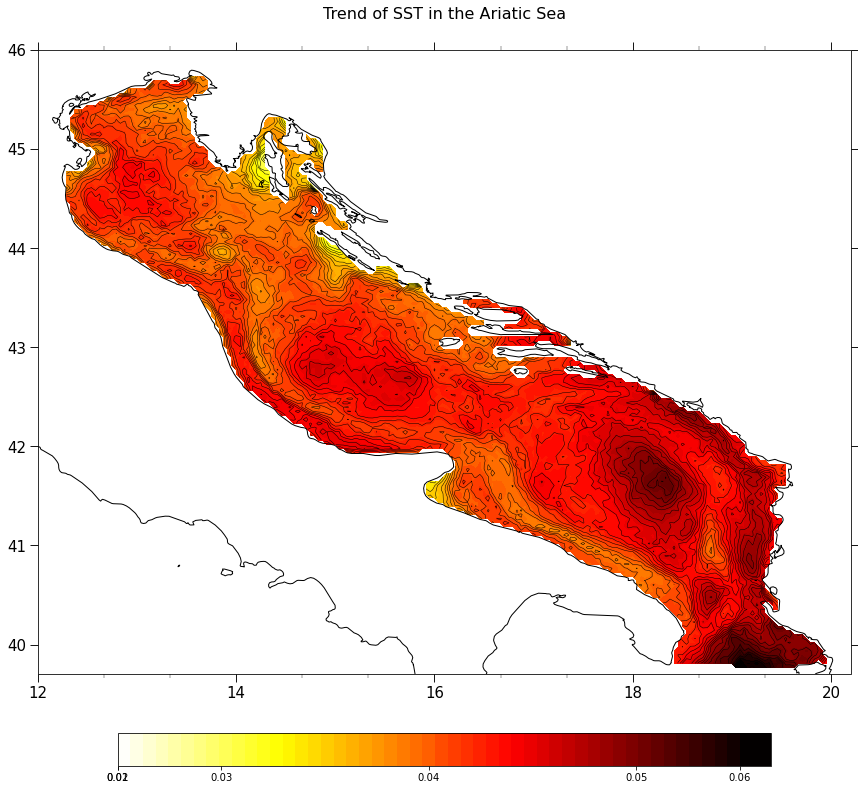

In [30]:
fig = plt.figure(figsize=(12, 12))

#  coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=1,alpha=0.9999)




# Import an NCL colormap

newcmp = gvcmaps.GMT_hot
reversed_color_map = newcmp.reversed()
# Contourf-plot data: external contour
heatmap = t.thetao.plot.contourf(ax=ax,
                          transform=projection,
                          levels=50,
                          vmin=0.025,
                          vmax=0.055,
                          cmap=reversed_color_map,
                          add_colorbar=False)

lines=t.thetao.plot.contour(ax=ax,alpha=1,linewidths=0.5,colors = 'k',linestyles='None',levels=50)
gvutil.set_axes_limits_and_ticks(ax,
                                 xlim=(12, 22),
                                 ylim=(37, 46),
                                 xticks=np.linspace(12, 22, 6),
                                 yticks=np.linspace(37, 46, 10))

gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=15)


cbar_ticks=np.arange(0.01, 0.07, 0.01)
cbar = plt.colorbar(heatmap,
                    orientation='horizontal',
                    shrink=0.8,
                    pad=0.073,
                    extendrect=True,
                    ticks=cbar_ticks)
ax.set_extent([12, 20.2, 39.7, 46])
#ax.set_extent([12.1458333333333321, 14.8124999999999982, 43.9583340312159336, 45.7916678850040881])
#ax.set_extent([12.9030545454545, 15.5260363636364, 42.67, 45.1154181818182])
#ax.set_extent([14.0166636363636, 17.1778454545455, 41.9038828181818, 43.8950363636364])
#ax.set_extent([15.8904181818182, 19.9877818181818, 39.6991617292197, 43.1738818181818])
gvutil.set_titles_and_labels(
    ax,
    maintitle="Trend of SST in the Ariatic Sea",
    maintitlefontsize=16,
    xlabel="",
    ylabel="")

plt.tight_layout()

ax.xlabel_style = {'size': 20, 'color': 'k'}
ax.ylabel_style = {'size': 20, 'color': 'k'}
plt.savefig('adriaClimIndUtilsStats_output.png')
